# Employee Attrition Prediction Model

## Prepare Environment

Run this cell to prepare your Python environment by installing necessary packages.

In [ ]:
# Run this cell to prepare your Python environment by installing necessary packages.
# Note: Your may need to restart the kernel after running this cell.
%pip install -r requirements.txt

## Import Libraries

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


## Load the data

In [167]:
df = pd.read_csv("HR-Employee-Attrition.csv")

display(df.head())

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Explore the Data

Attrition
No     1233
Yes     237
Name: count, dtype: int64

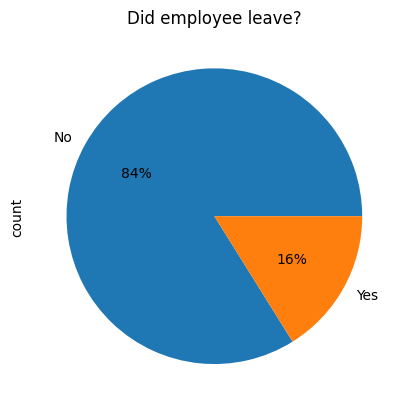

In [168]:
# let's see how many employees left the company and how many stayed
display(df['Attrition'].value_counts())
df['Attrition'].value_counts().plot(kind='pie', labels=['No', 'Yes'], autopct='%1.0f%%')
plt.title("Did employee leave?")
plt.show()


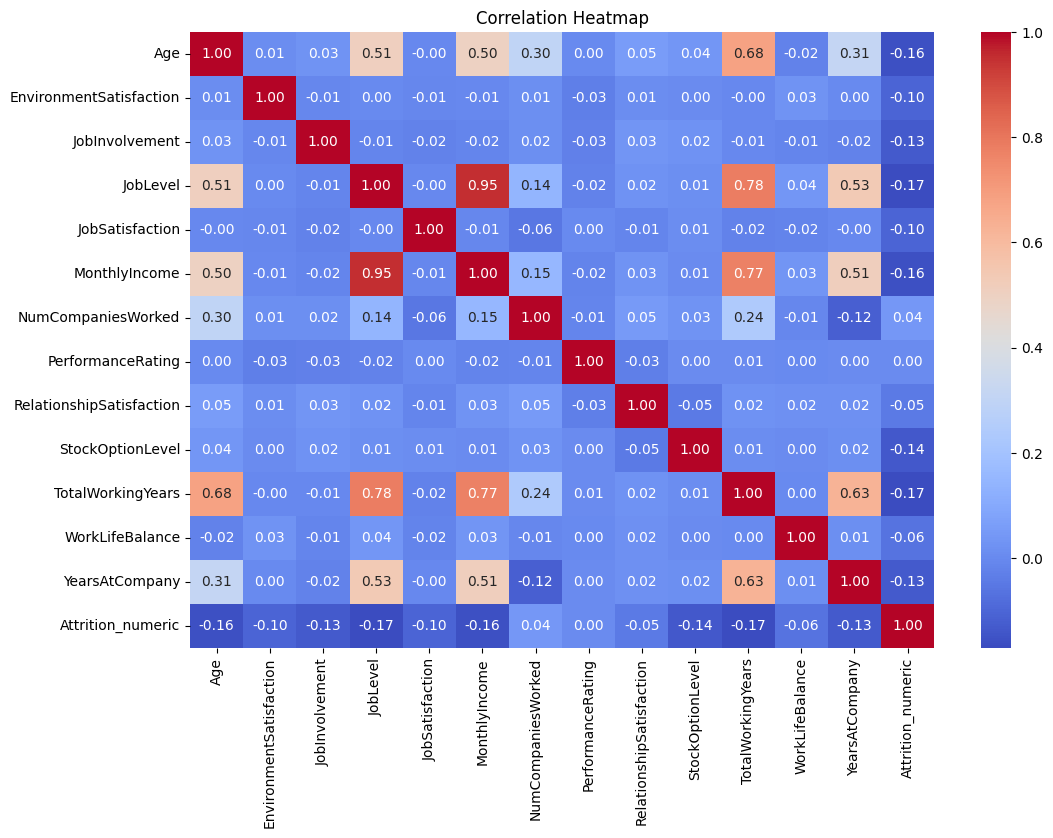

In [169]:
# Convert the 'Attrition' string to binary values (0 and 1)
df['Attrition_numeric'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Select some interesting features to analyze
selected_columns = ['Age', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 
                   'NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 
                   'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany', 'Attrition_numeric']

# compute the correlation matrix
correlation_matrix = df[selected_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Create Prediction Model

### Prepare data for the model

In [170]:
X = df[selected_columns].drop(columns=['Attrition_numeric']) # features
y = df['Attrition_numeric'] # target variable

# Split the data into training and testing sets. 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)


### Create and train the model

In [171]:
model = RandomForestClassifier(random_state=2)
model.fit(X_train, y_train) # train the model


RandomForestClassifier(random_state=2)

### Evaluate Model

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       370
           1       0.64      0.20      0.30        71

    accuracy                           0.85       441
   macro avg       0.75      0.59      0.61       441
weighted avg       0.83      0.85      0.82       441



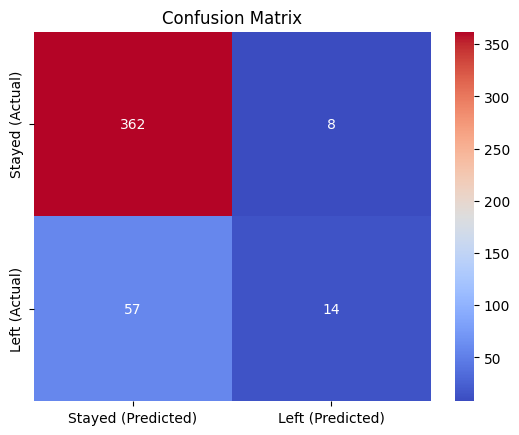

In [172]:
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model performance
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="coolwarm", 
            xticklabels=['Stayed (Predicted)', 'Left (Predicted)'], 
            yticklabels=['Stayed (Actual)', 'Left (Actual)'])
plt.title("Confusion Matrix")
plt.show()


## What parameters drive attrition?

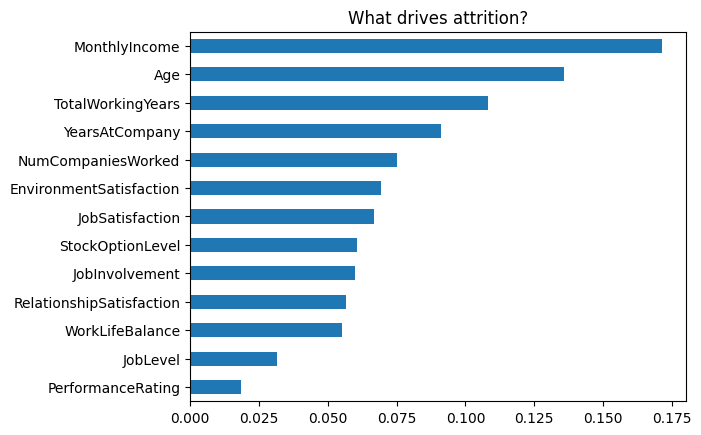

In [173]:
# let's see which features are the most important for predicting attrition
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title("What drives attrition?")
plt.show()
